# Function approximation in Python

* we have a function of interest $f(x)$, that is hard to compute
* hence, we compute $f$ on $n$ points in the domain; and we need to approximate the value of the function at arbitary points between the $n$ points 


1. Piece-wise approach: connect the dots 
    
2. Use a *similar* function $s(x)$ to represent $f(x)$ between the points

--

* function approximation: the approximation curve passes through the points of data
* curve fitting: when the data has **noise**, then we want to find an approximation for the central tendency in the data

--

Extrapolation: computing the approximated function outside the original data interval
- should be avoided... 
- theoretical properties might not be known, etc. 

## Spline interpolation 

* curve composed of independent pieces 
    - i.e. lines connecting the points of data 
    
* cubic splines
    - order is 4
    - function $s(x)$ is a polynomial of degree 3
    - 4 unknown coefficients (from polynomial) for each of the $n$ intervals 
    - $2n$ equations to make sure that each segment of the function passes through its interval points (each line passes through a point twice)
    - $2(n - 1)$ equations to ensure two continuous derivatives at each interior point (smoothness conditions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2008) # fix random number sequences
x  = np.sort(np.random.uniform(-5,10,12)) # sorted random numbers on [-5,10]
xr = np.linspace(-5,10,12) # regular grid on [-5,10]

func=lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2) # function to interpolate

In [2]:
def plot1(ifunc,fdata=(x,func(x)),f=func,color='b',label='',extrapolation=False):
    '''helper function to make plots'''
    xd = np.linspace(-5,10,1000) # for making continuous lines
    plt.figure(num=1, figsize=(10,8))
    plt.scatter(fdata[0],fdata[1],color='r') # interpolation data
    plt.plot(xd,f(xd),color='grey') # true function
    if extrapolation:
        xdi = xd
    else:
        # restriction for interpolation only
        xdi=xd[np.logical_and(xd>=fdata[0][0],xd<=fdata[0][-1])]
    if ifunc:
        plt.plot(xdi,ifunc(xdi),color=color,label=label)
        if label:
            plt.legend()
    elif label:
        plt.title(label)

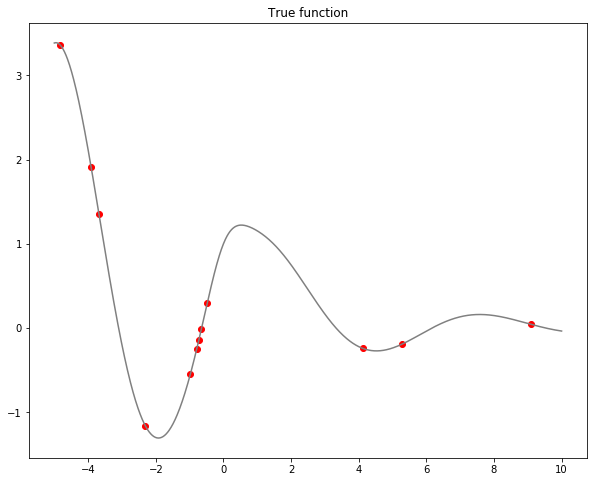

In [4]:
plot1(None,label='True function')

# red dots are location of grid points (that we have computed)

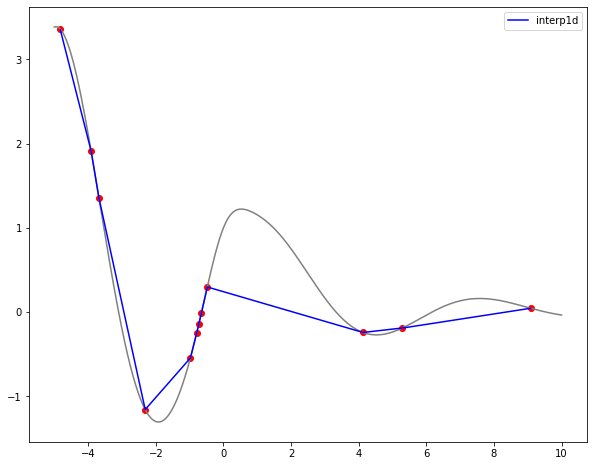

In [5]:
from scipy import interpolate # Interpolation routines
fi = interpolate.interp1d(x,func(x)) # returns the interpolation function
plot1(fi,label='interp1d')

In [6]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      

**bounds_error**: raises a ValueError when extrapolation is attempted (and inaccuracy can arise)

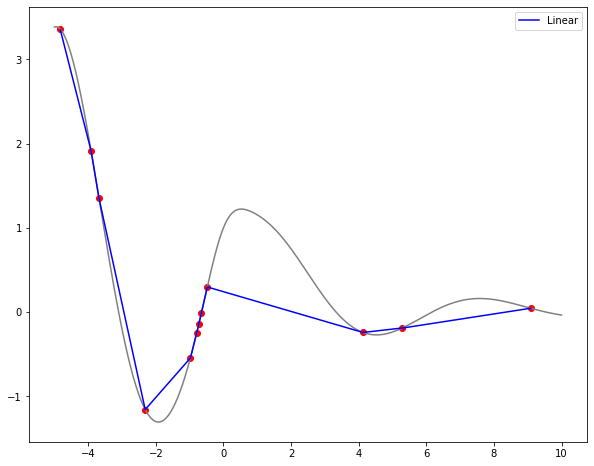

In [7]:
fi = interpolate.interp1d(x,func(x),kind='linear')
plot1(fi,label='Linear')

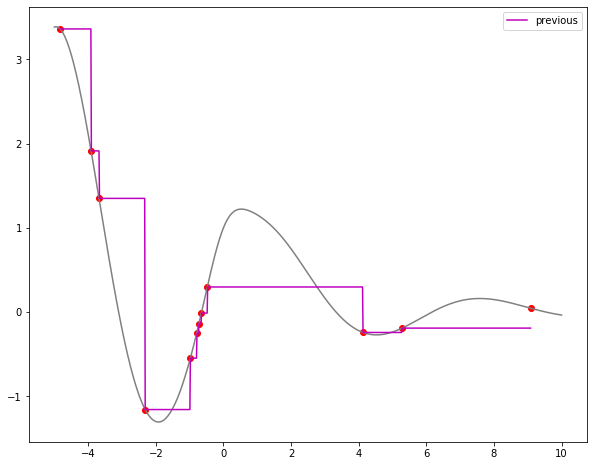

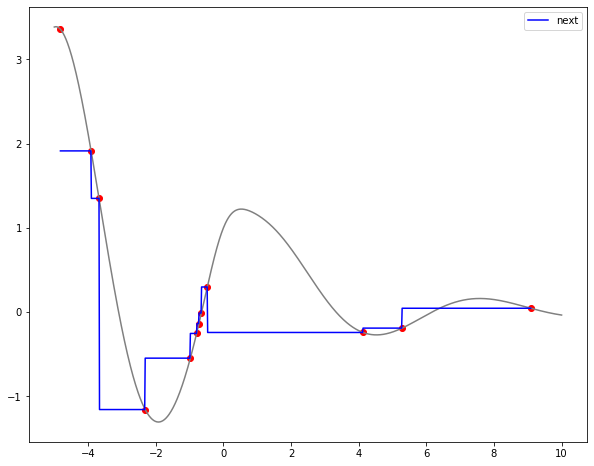

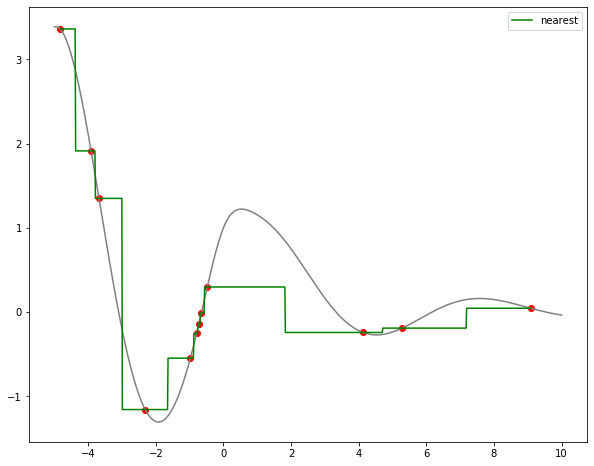

In [8]:
for knd, clr in ('previous','m'),('next','b'),('nearest','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd)
    plot1(fi,label=knd,color=clr)
    plt.show()
    
# previos value is used all the way until the next dot 

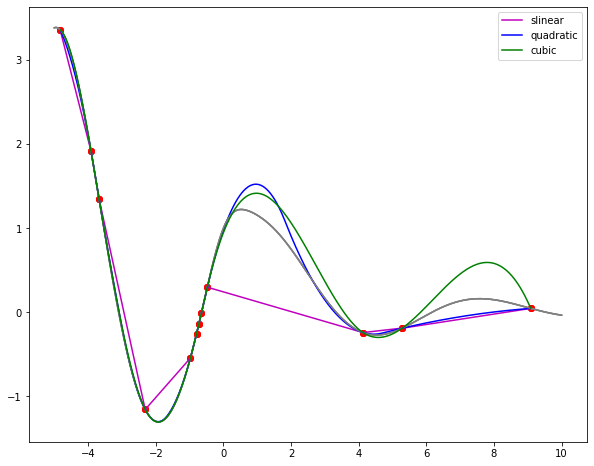

In [9]:
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd)
    plot1(fi,color=clr,label=knd)

Max error with  slinear splines is 1.05142e+00
Max error with  quadratic splines is 3.89974e-01
Max error with  cubic splines is 4.35822e-01


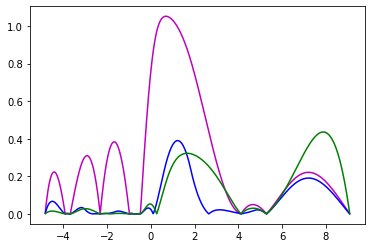

In [11]:
# Approximation errors
# x = np.sort(np.random.uniform(-5,10,11))  # generate new data
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

Max error with  slinear splines is 4.63043e-01
Max error with  quadratic splines is 3.48546e-01
Max error with  cubic splines is 1.89578e-01


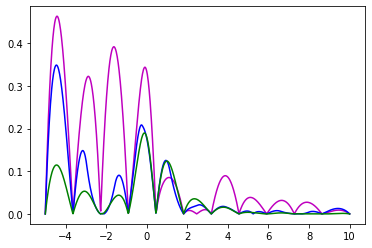

In [12]:
# Approximation errors for regular grid
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(xr,func(xr),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

How to reduce errors?

* use more nodes/ points
* use more regular nodes (i.e. evenly spaced)
* match the interpolation function to the function of interest 

## Polynomial approximation/ interpolation

* functional form is polynomial of degree $n$

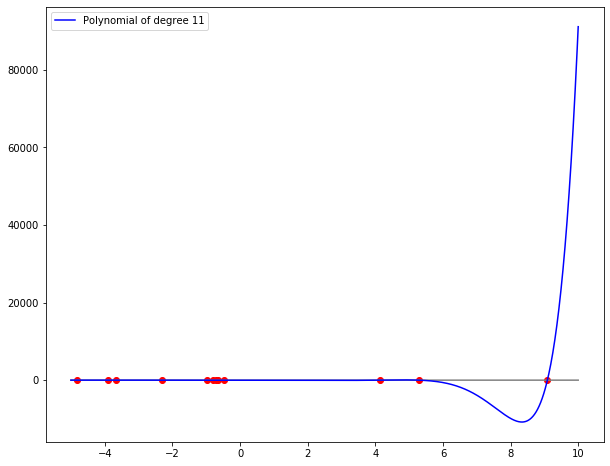

In [13]:
from numpy.polynomial import polynomial
degree = len(x)-1 # passing through all dots
p = polynomial.polyfit(x,func(x),degree) # polynomial fit of x and y (data points)
fi = lambda x: polynomial.polyval(x,p) # value of polynomial (x is polynomial coefficients, p is the array of 
# numbers at which to evalute x)
plot1(fi,label='Polynomial of degree %d'%degree,extrapolation=True)

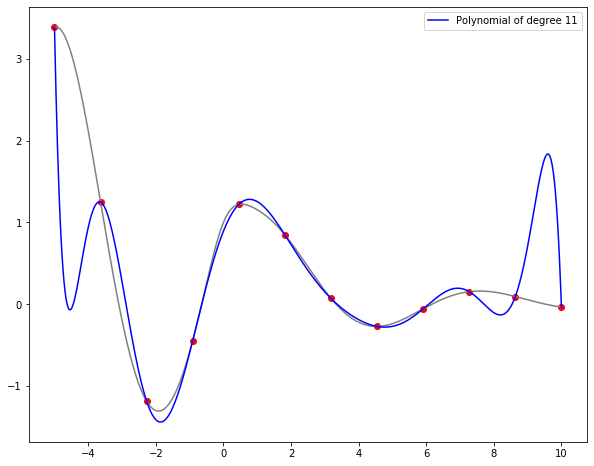

In [15]:
# now with regular grid
degree = len(x)-1 # passing through all dots
p = polynomial.polyfit(xr,func(xr),degree)
fi = lambda x: polynomial.polyval(x,p)
plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,extrapolation=True)

# when we force the polynomial to go through data points, we cannot say for certain that the function won't make large 
# mistakes (like we see here)

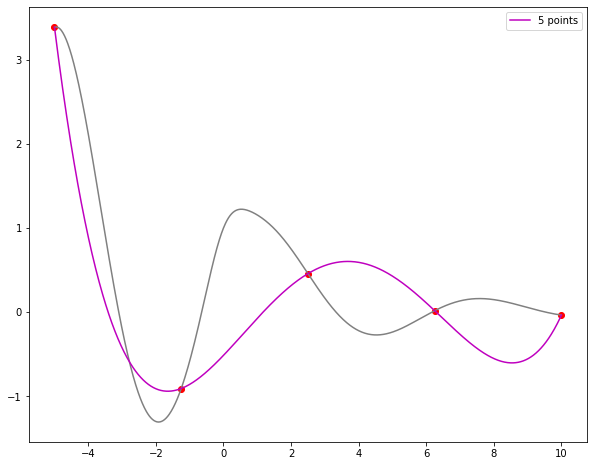

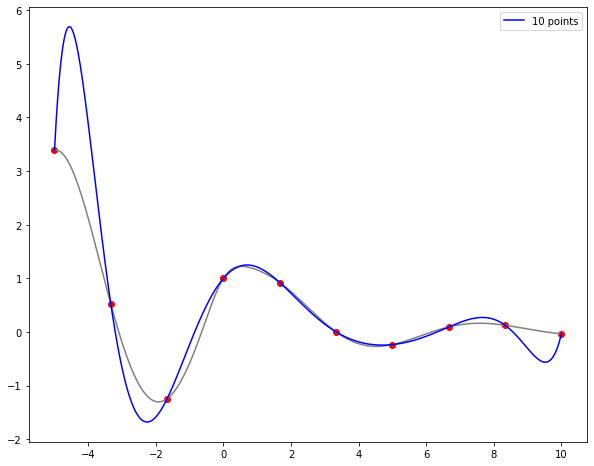

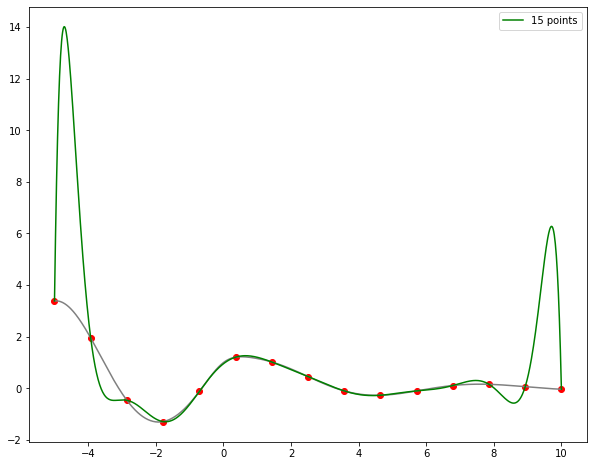

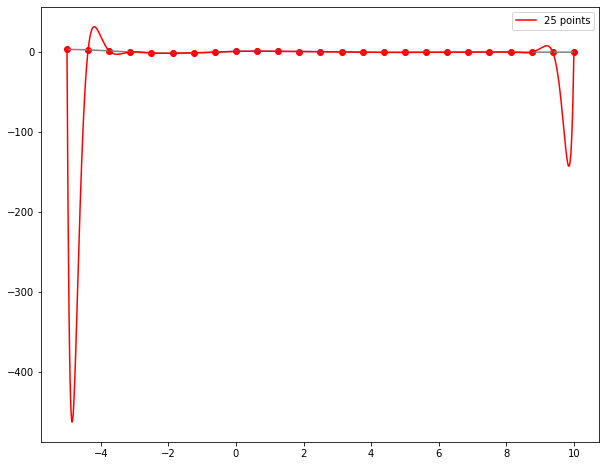

In [16]:
# how number of points affect the approximation (with degree=n-1)
for n, clr in (5,'m'),(10,'b'),(15,'g'),(25,'r'):
    x2 = np.linspace(-5,10,n)
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()
    
# This is like Occam's Razor

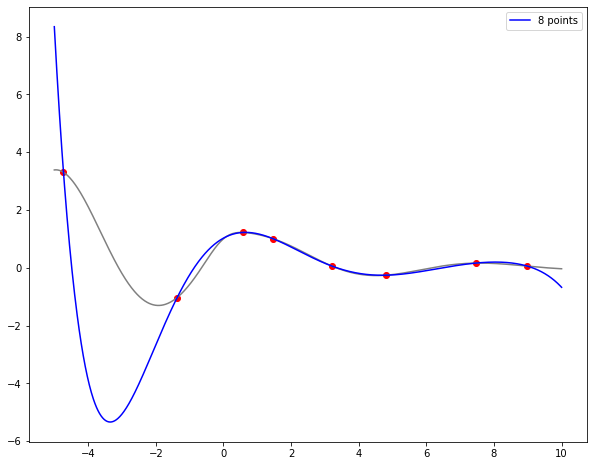

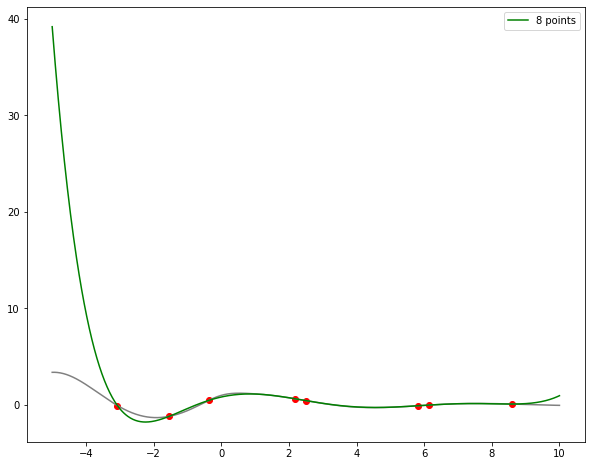

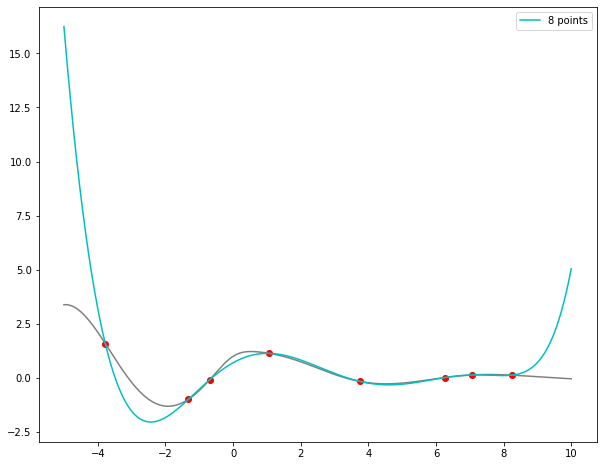

In [17]:
np.random.seed(2025)
n=8
for clr in 'b','g','c':
    x2 = np.linspace(-4,9,n) + np.random.uniform(-1,1,n) # perturb points a little
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()

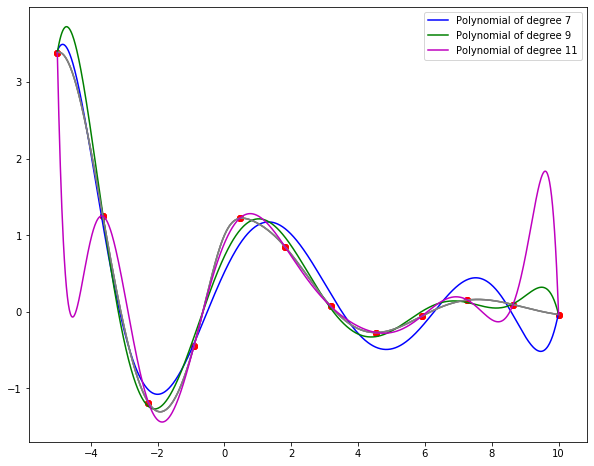

In [19]:
# how degree of the polynomial affects the approximation
for degree, clr in (7,'b'),(9,'g'),(11,'m'):
    p=polynomial.polyfit(xr,func(xr),degree)
    fi=lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,color=clr,extrapolation=True)
    
# if degree < number of points, then the function cannot fit the data 
# just approximates them (minimise sum of squared differences)

Use functional form $g(x)$ from class $G$ such that:

$g = \mathrm{arg min}_{g \in G}(||f - g||)^{2}$

Orthogonality:
* inner product of polynomials
* if equal to zero, then orthogonal 
* in L2-norm (Euclidean space), the distance (square root of the squared residuals)

Given the large inaccuracies, we might like to use the uniform (sup-) norm; which looks at the maximum distance

### Chebyshev (minmax) approximation 

* optimally chooses the location of the nodes


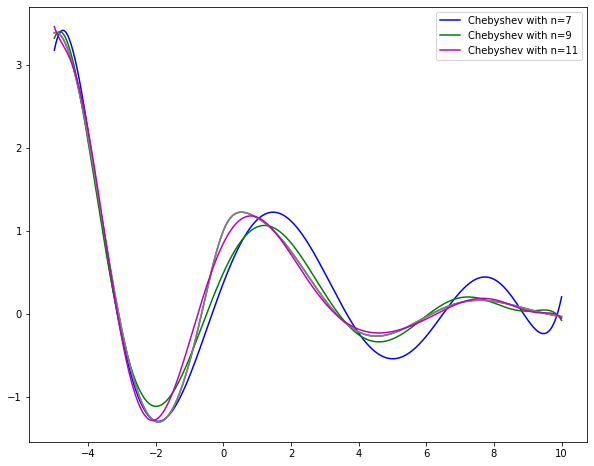

In [20]:
import numpy.polynomial.chebyshev as cheb
for degree, clr in (7,'b'),(9,'g'),(11,'m'):
    fi=cheb.Chebyshev.interpolate(func,degree,[-5,10])
    plot1(fi,fdata=(None,None),color=clr,label='Chebyshev with n=%d'%degree,extrapolation=True)

# Cake eating model with discretized choice 

* rather than it being solved "on the grid"
* discretize $\mathbf{W}$, with some upper bound $\bar{W}$ and lower bound 0; calculate value and policy function at all these points
    - then interpolate the rest of them ($W - c$) is "off the grid"
    - "on the grid" led to inaccurate solution 

## On the grid model

In [2]:
import numpy as np
class cake_ongrid():
    '''Simple class to implement cake eating problem on the grid'''

    def __init__(self,beta=.9, Wbar=10, ngrid=50):
        '''Initializer'''
        self.beta = beta    # Discount factor
        self.Wbar = Wbar    # Upper bound on cake size
        self.ngrid = ngrid  # Number of grid points
        self.epsilon = np.finfo(float).eps # smallest positive float number
        self.grid = np.linspace(self.epsilon,Wbar,ngrid) # grid for both state and decision space

    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on grid'''
        c = self.grid - self.grid[:,np.newaxis] # current state in columns and choices in rows
        c[c==0] = self.epsilon # add small quantity to avoid log(0)
        mask = c>0 # mask off infeasible choices
        matV1 = np.full((self.ngrid,self.ngrid),-np.inf) # init V with -inf
        matV0 = np.repeat(V0.reshape(self.ngrid,1),self.ngrid,1) #current value function repeated in columns
        matV1[mask] = np.log(c[mask])+self.beta*matV0[mask] # maximand of the Bellman equation
        V1 = np.amax(matV1,axis=0,keepdims=False) # maximum in every column
        c1 = self.grid - self.grid[np.argmax(matV1,axis=0)] # consumption (index of maximum in every column)
        return V1, c1

    def solve(self, maxiter=1000, tol=1e-4, callback=None):
        '''Solves the model using VFI (successive approximations)'''
        V0=np.log(self.grid) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman(V0)
            if callback: callback(iter,self.grid,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1

## Analytical solution

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def check_analytic(model):
    '''Check the cake eating numerical solution against the analytic solution'''
    # analytic solution
    aV = lambda w: np.log(w)/(1 - model.beta) + np.log(1 - model.beta)/(1 - model.beta) + model.beta* np.log(model.beta)/((1 - model.beta)**2)
    aP = lambda w: (1 - model.beta) * w
    grid = model.grid  # grid from the model
    xg = np.linspace(model.epsilon,model.Wbar,1000)  # dense grid for analytical solution
    V,policy = model.solve()  # solve the model
    # make plots
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
    ax1.grid(b=True, which='both', color='0.65', linestyle='-')
    ax2.grid(b=True, which='both', color='0.65', linestyle='-')
    ax1.set_title('Value functions')
    ax2.set_title('Policy functions')
    ax1.set_xlabel('Cake size, W')
    ax2.set_xlabel('Cake size, W')
    ax1.set_ylabel('Value function')
    ax2.set_ylabel('Policy function')
    ax1.plot(grid[1:],V[1:],linewidth=1.5,label='Numerical')
    ax1.plot(xg,aV(xg),linewidth=1.5,label='Analytical')
    ax2.plot(grid,policy,linewidth=1.5,label='Numerical')
    ax2.plot(grid,aP(grid),linewidth=1.5,label='Analytical')
    ax1.legend()
    ax2.legend()
    plt.show()

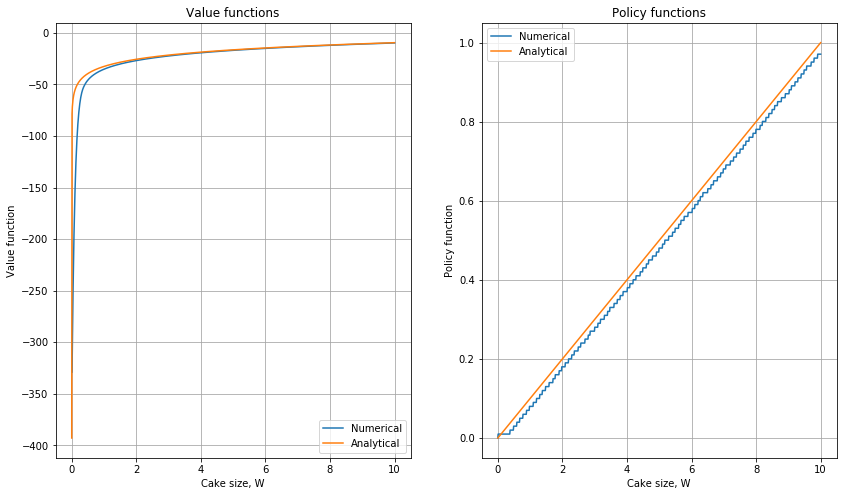

In [5]:
m1 = cake_ongrid(beta=0.9,Wbar=10,ngrid=1000)
check_analytic(m1)

### Interpolation of the value function

* discretize the choice variable to avoid solving for optimal choice for each value of wealth (iteration)
* use interpolation of already computed next period value function
* control for grid over state space separately from the discretization of the choice variables 


* discretize state space with $\mathbf{W} \in \{0,...,\bar{W}\}$
* discretize decision space with $\mathbf{D} \in \{0,...,\bar{D}\}$, usually $\bar{D} = \bar{W}$

$V_{i}(\mathbf{W}) = \max_{c \in \mathbf{D}}\Big\{u(c) + \beta V_{i-1}(\mathbf{W} - c)\Big\}$


1. Compute value and policy function on grid $\mathbf{W}$
2. Find maximum of points in decision space
3. In each iteration, the value function is computed on set of grid points
4. Then we interpolate the value function

In [6]:
from scipy import interpolate

In [28]:
class cake_discretized():
    '''Class to implement cake eating model with discretized choice'''
    
    def __init__(self,beta=.9, Wbar=10, ngrid=50, nchgrid=100, optim_ch=True):
        '''Initializer'''
        self.beta = beta    # Discount factor
        self.Wbar = Wbar    # Upper bound on cake size
        self.ngrid = ngrid  # Number of grid points
        self.nchgrid = nchgrid # Number of grid points for choice grid
        self.epsilon = np.finfo(float).eps # smallest positive float number
        self.grid = np.linspace(self.epsilon,Wbar,ngrid) # grid for state space
        self.chgrid = np.linspace(self.epsilon,Wbar,nchgrid) # grid for decision space
        self.optim_ch = optim_ch # optimisation of the choice grid

    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on grid'''
        c = self.chgrid[:,np.newaxis] # choices in columns, and state space in rows
        if self.optim_ch:
            c = c + np.zeros(self.ngrid) # matrix of consumption values 
            c *= self.grid/self.Wbar # multiple each column by fraction that grid point has in the upper bound
        # scale choices to ensure that c < W
        
        W = self.grid # one-dimensional (row vector)
        
        
        interp = interpolate.interp1d(self.grid,V0,bounds_error=False,fill_value='extrapolate') # defined over (x,f(x))
        # need to allow for exterpolation
        
        matV1 = np.log(c) + self.beta * interp(W-c)
        matV1[c>W] = -np.inf # infeasible choices are given negative infinity 
        
        V1 = np.amax(matV1,axis=0,keepdims=False) # maximum in every column
        
        if self.optim_ch:
            c1 = c[np.argmax(matV1,axis=0),np.arange(self.ngrid)] # consumption (index of maximum in every column)
        # c is now a matrix (due to += above)
        else:
            c1 = c[np.argmax(matV1,axis=0)]
        return V1, c1

    def solve(self, maxiter=1000, tol=1e-4, callback=None): # no changes here
        '''Solves the model using VFI (successive approximations)'''
        V0=np.log(self.grid) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman(V0)
            if callback: callback(iter,self.grid,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1

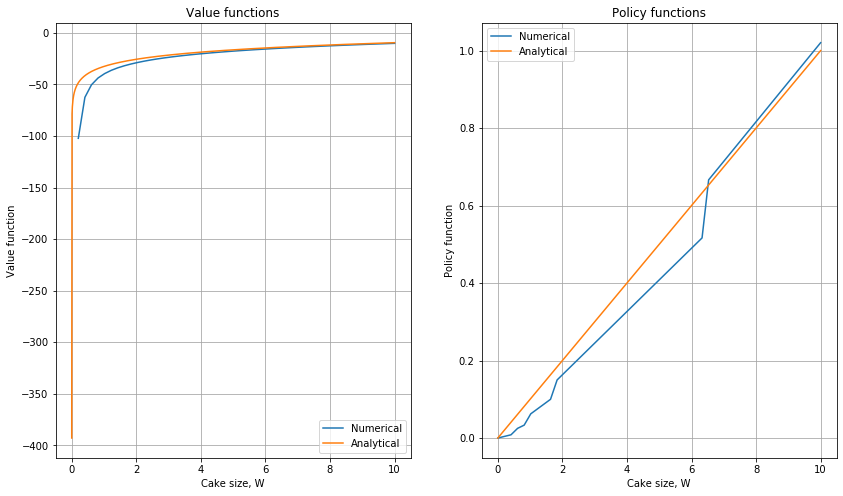

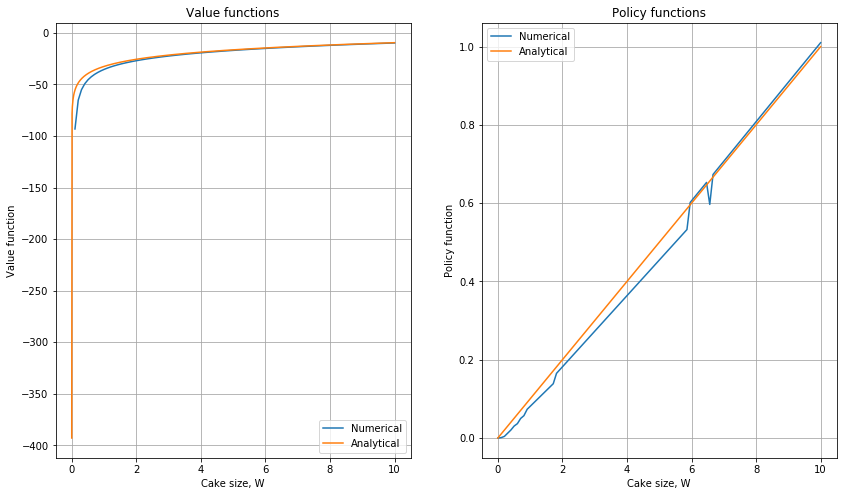

In [33]:
m1 = cake_ongrid(     beta=0.9,Wbar=10,ngrid=50)
m2 = cake_discretized(beta=0.9,Wbar=10,ngrid=50,nchgrid=50,optim_ch=True) # if they have the same number of points (the grids); then
# it is essentially the same problem we are solving
m3 = cake_discretized(beta=0.9,Wbar=10,ngrid=100,nchgrid=100,optim_ch=True)
#check_analytic(m1)
check_analytic(m2)
check_analytic(m3)

If we decrease $\beta$ then the slope of the analytical solution changes, and can be approximated better by the solution methods.

### How to increase accuracy?
* increase the number of grid points (state and choice space)
    - easy to implement when executing model
* optimize the use of grid points in the choice space by accounting for the constraints of the model
    - when solving on grid, we can't do much here
    - for choice grid, we are only using the points where $W > c$, so we only need to use half the matrix (of choice x state grid) 
        - currently, half of the matrix is -inf
        - we could try to compress the matrix into areas where they are useful 
* relocate the state grid points toward areas of higher curvature of the value function
    - put more grid points into that area of curvature (then the curve is smoother) 
* use a more sophisticated approximation technique
    - like Chebyshev polynomial, etc.

### When writing code

* taking into account the theoretical properties of the models makes the code better 

### Own models

* when testing if you code fits well in a model without an analytical solution, you could check if the the policy functions closely match when there are simplying assumptions made? 
    - most likely not, since we are then extrapolating?
* try to match to moments instead... 

# Random numbers in Python, Monte Carlo methods

* Theory of probability: know distribution laws
* Mathematical statistics: unknown distributions (might just know the family of distributions that DGP belows to)
* Econometrics: application of statistics to economics 

### Random variables

$\tilde{X} = (\Omega, \Sigma, P)$

* set of all outcomes
* subsets of $\Omega$ (outcomes that might happen)
* probability measure over $\Sigma$

If the RV is discrete, then $\Omega$ is a finite set, etc. 

$P(A) = \sum_{i: x_{i} \in A}p_{i}$, $\forall A \in \Sigma$

If the RV is continuous, then $P([a,b]) = F(b) - F(a)$ with:

$F(x) = \int_{-\infty}^{x}f(t)dt = P(\{\tilde{X} \leq x\}$ (cumulative distribution function)

* $f(t)$ is a pdf

#### Moments 

$E(\tilde{X}) = \int_{\Omega}xdF(x) = \int_{\Omega}xf(x)dx$ or $= \sum_{i=1}^{n}x_{i}p_{i}$

$D(\tilde{X}) = E\Big(\tilde{X} - E(\tilde{X})\Big)^{2}$


#### Random sample

* realisations of RV drawn independently one-by-one from distribution of $\tilde{X}$
* simulation of the RV is the same as random sampling
    - economic models are a RV because they are a function of RVs


### Generating random numbers 

* rand() returns a uniform number on [0,1]
    - these are pseudo-random number generator (that looks close enough to being random)
        - function should satisfy statistical properties, must be fast, etc. 
* there are a number of Python modules that generate numbers randomly 

In [40]:
import random
x = [random.random() for i in range(100)]
print(*x[:10],sep='\n')

# the * converts the list into the list of arguments (to be separated)

0.2501780367064772
0.0576414702894249
0.18905600045808912
0.6023700673529763
0.5437504709933815
0.5928116166217428
0.2006503318277142
0.9691110630672661
0.13202228685443418
0.4424731182085866


In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def hist(data,bins='auto',range=None,theoretical=None,cdf=False):
    '''Draws histogram of data, imposes a theoretical distribution if given'''
    fig, ax = plt.subplots(figsize=(10,6))
    if cdf:
        # plot CDF instead of histogram
        plt.hist(data,bins=len(data),range=range,cumulative=True,density=True,align='right',histtype='step',color='black')
    else:
        plt.hist(data,bins=bins,range=range,density=True,histtype='bar',color='lightgrey',edgecolor='k')
    if theoretical and len(data)>0:
        # add theoretical distribution
        x = (np.linspace(range[0],range[-1],100) if range else np.linspace(min(data),max(data),100))
        y = theoretical(x)
        plt.plot(x,y,'r-')

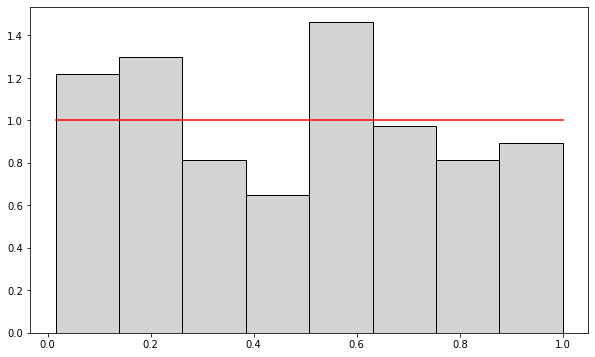

In [41]:
import scipy.stats
hist(x,theoretical=scipy.stats.uniform.pdf)

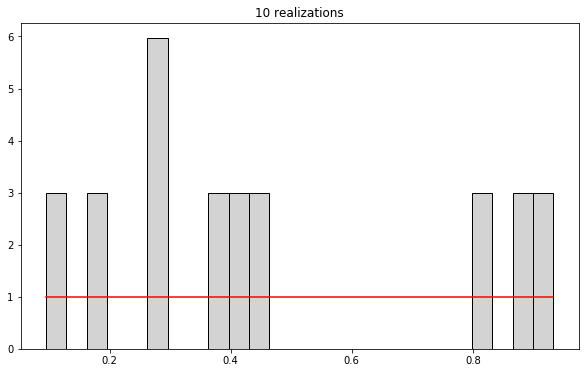

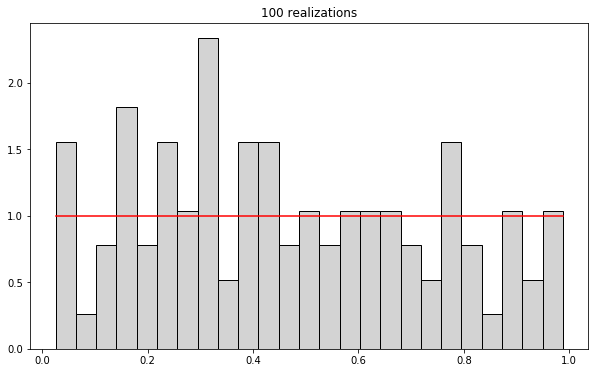

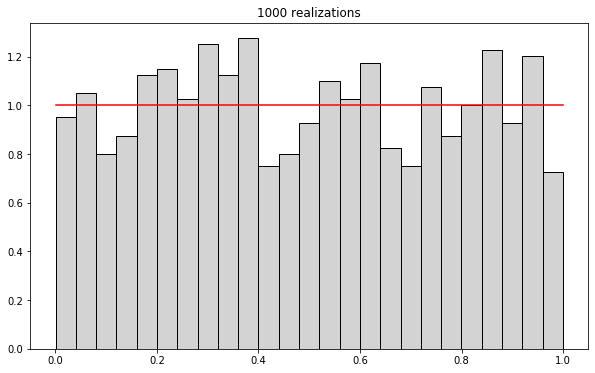

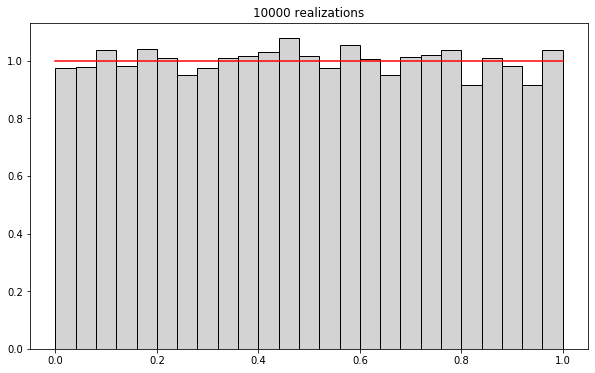

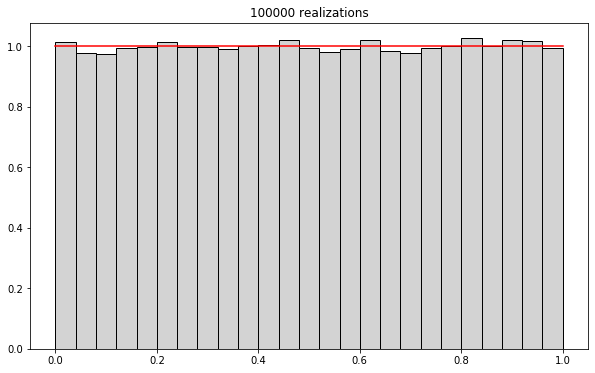

In [42]:
for i in range(1,6):
    n=10**i # 10 to 10^5
    data = np.random.random(n) #NumPy
    hist(data,bins=25,theoretical=scipy.stats.uniform.pdf)
    plt.title('%d realizations'%n)

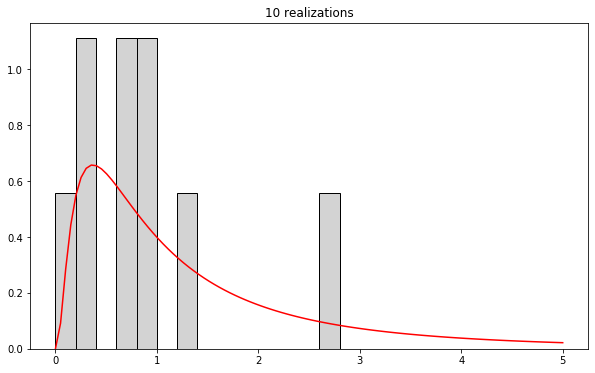

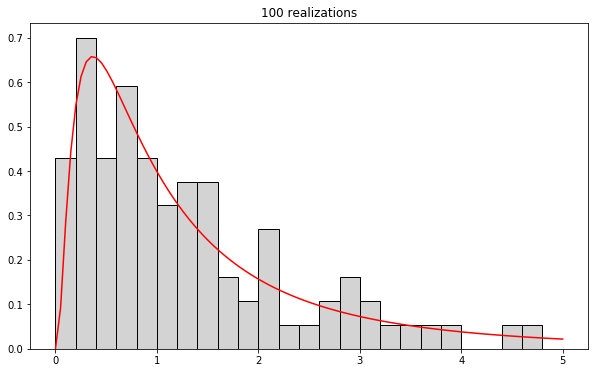

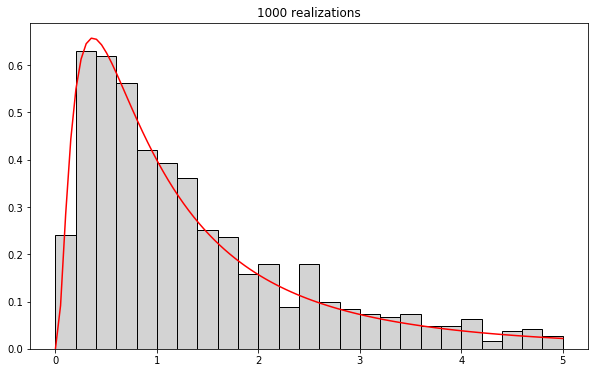

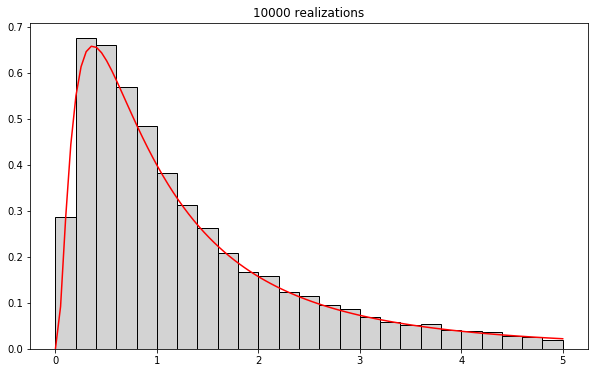

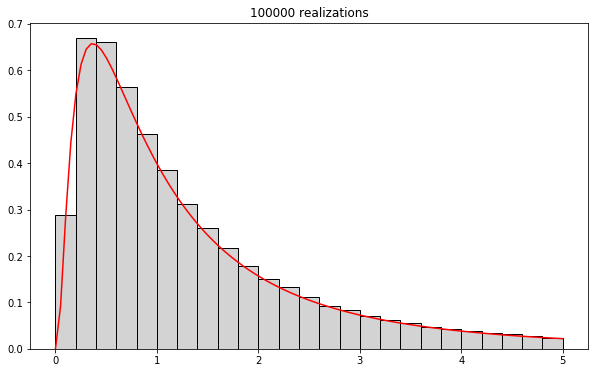

In [48]:
for i in range(1,6):
    n=10**i # 10 to 10^5
    data = np.random.lognormal(size=n) #NumPy
    hist(data,bins=25,range=(0,5),theoretical=lambda x: scipy.stats.lognorm.pdf(x,1.0))
    plt.title('%d realizations'%n)

### Simulating from any distribution

* if we are simulating a distribution that is not on the scipy.stats for instance

**Inverse transform sampling**

Let $F(x)$ be a cdf of the RV, with inverse $F^{(-1)}(x)$ (assumed to be well-defined). To simulate $\tilde{X}$:

1. Simulate ($u_{1},...u_{n})$ from a standard uniform distribution
2. Return $\big(F^{(-1)}(u_{1}),...,F^{(-1)}(u_{n})\big)$, which are the realisations from $F(\tilde{X})$. 

### Repeated simulations 

* might want to make sure that the generated random numbers are the same across the program

seed()

get_state()

set_state()

## Monte Carlo method

* to solve deterministic problem using random numbers 
* eg. compute $\pi$
    - unit circle
        - area is $\pi$
    - throw dots on the square, and the proportion landing inside the square $\cdot$ four is pie 

In [55]:
def pimc(n=100): # number of dots used for calculation
    '''Compute pi using Monte Carlo with sample size n'''
    d = np.random.uniform(size=(2,int(n))) # 2 x n (for two coordinates of the dots)
    d2 = np.sum(d**2,axis=0) # distance to circle should be below (we square the coordinates)
    n1 = np.sum(d2<1) # should be less than one
    s4 = n1/n
    return 4*s4

d = pimc(n=1e6)
print('Estimate of pi is %1.5f, bias %1.3e'%(d,d-np.pi))

Estimate of pi is 3.14425, bias 2.655e-03


In [54]:
data=[]
for i in range(8):
    n = 10**i
    d = pimc(n)
    print('Estimate of pi is %1.5f, %1.0e points, bias %1.3e'%(d,n,d-np.pi))

Estimate of pi is 0.00000, 1e+00 points, bias -3.142e+00
Estimate of pi is 3.60000, 1e+01 points, bias 4.584e-01
Estimate of pi is 3.16000, 1e+02 points, bias 1.841e-02
Estimate of pi is 3.14800, 1e+03 points, bias 6.407e-03
Estimate of pi is 3.15160, 1e+04 points, bias 1.001e-02
Estimate of pi is 3.12956, 1e+05 points, bias -1.203e-02
Estimate of pi is 3.14182, 1e+06 points, bias 2.233e-04
Estimate of pi is 3.14181, 1e+07 points, bias 2.169e-04


Estimate of pi is 3.14178, bias 1.909e-04


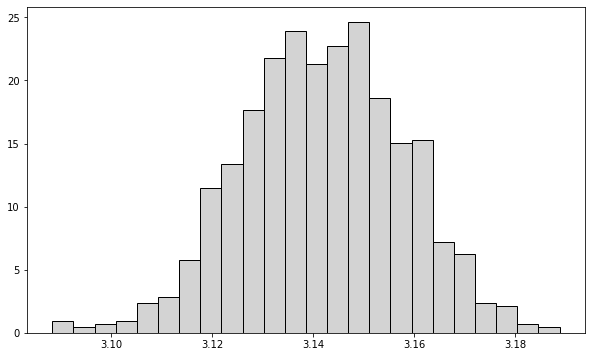

In [56]:
data=[]
for i in range(1000):
    data.append(pimc(n=10000))
hist(data)
d = np.mean(data)
print('Estimate of pi is %1.5f, bias %1.3e'%(d,d-np.pi))

* convergence is slow 
* fitted better to some tasks than others 
    - simulating economic models 
    - testing estimators in econometrics 
    - computing high dimension integrals 
        - there is a curse of dimensionality though

Let $f(x) = x^{k}$ and $g(x) = 1 + \frac{1}{k}\cos(2\pi x)$. Is $g(x) > f(x)$ on [0,1] for all $k \geq 1.5$? 

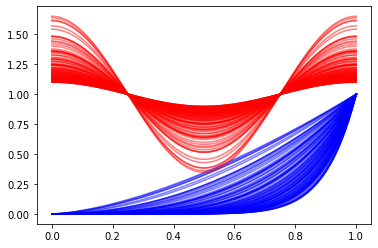

The simulated proposition is: False
Failing values of k: [1.56486591 1.53403806]


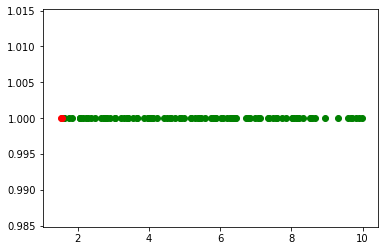

In [58]:
x = np.linspace(0,1,1000).reshape([-1,1]) # space for check points on [0,1], column
N = 100 # number of random draws of parameters
k = np.random.uniform(low=1.5,high=10,size=N)  # generate k (draws of RV)
f = x ** k
g = 1 + np.cos(x*2*np.pi) / k

# plot the functions
fig, ax = plt.subplots()
ax.plot(x,f,color='b',alpha=0.5)
ax.plot(x,g,color='r',alpha=0.5)
plt.show()

check = np.array(np.all(g>f,axis=0)) # simulate the proposition
fk = k[np.logical_not(check)]
answer = np.all(check)
print('The simulated proposition is:',answer)
if not answer:
    print('Failing values of k:',fk,sep=' ')

# plot the functions
fig, ax = plt.subplots()
ax.scatter(k[check],np.ones(k[check].shape),color='g')
ax.scatter(fk,np.ones(fk.shape),color='r')
plt.show()